In [1]:
import csv
import codecs
import json
import folium
import datetime
import time
import sys
import graphviz

from skimage import io
import urllib.request

import dask.dataframe as dd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import rcParams

import math
import pickle
import os

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import scipy
import pdb
import warnings
from sklearn import linear_model

warnings.filterwarnings("ignore")

**Read the data**

In [83]:
weather_data_Jan_2022 =  pd.read_csv('/content/New York City, USA 2022-01-01 to 2022-01-31.csv')

In [84]:
weather_data_Jan_2022.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City, USA",2022-01-01T00:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.7,100.0,7.6,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
1,"New York City, USA",2022-01-01T01:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.5,100.0,7.2,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,"New York City, USA",2022-01-01T02:00:00,51.2,51.2,47.7,87.84,0.0,0,NaN,0.0,...,1012.6,100.0,6.3,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
3,"New York City, USA",2022-01-01T03:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.2,100.0,8.2,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
4,"New York City, USA",2022-01-01T04:00:00,50.2,50.2,47.8,91.36,0.0,0,NaN,0.0,...,1011.2,100.0,7.1,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC"


**2.a. Check for Missing Values**

In [85]:
nan_count  = pd.DataFrame()
nan_count['Count'] = weather_data_Jan_2022.isna().sum()

In [86]:
nan_count

,Count
name,0
datetime,0
temp,0
feelslike,0
dew,0
humidity,0
precip,0
precipprob,0
preciptype,615
snow,0


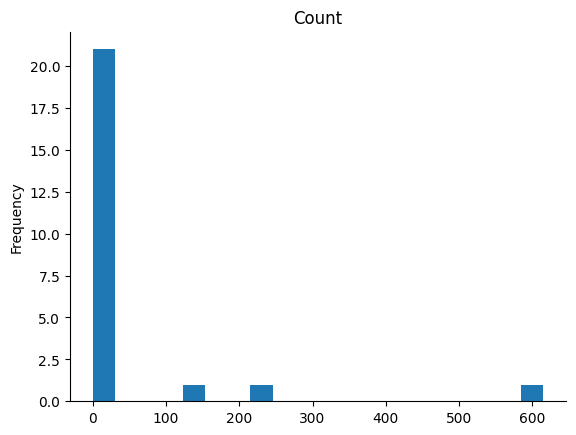

In [87]:
from matplotlib import pyplot as plt
nan_count['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Number of Missing values in attributes before Column Selection')

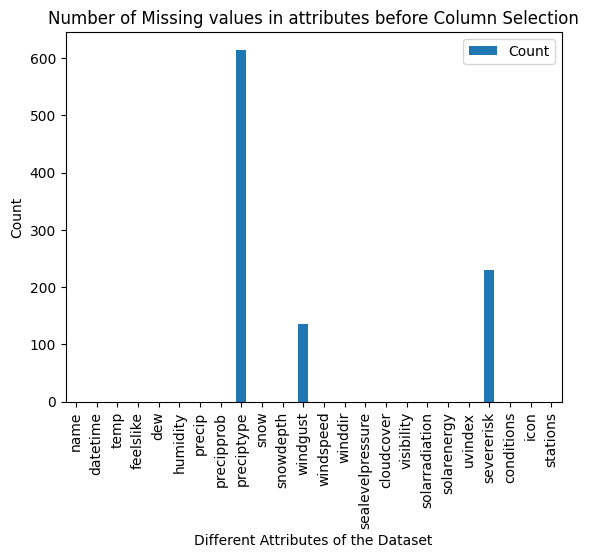

In [88]:
nan_count.plot(kind="bar")
plt.xlabel('Different Attributes of the Dataset')
plt.ylabel('Count')
plt.title("Number of Missing values in attributes before Column Selection")

In [89]:
weather_data_Jan_2022.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"New York City, USA",2022-01-01T00:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.7,100.0,7.6,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
1,"New York City, USA",2022-01-01T01:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.5,100.0,7.2,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,"New York City, USA",2022-01-01T02:00:00,51.2,51.2,47.7,87.84,0.0,0,NaN,0.0,...,1012.6,100.0,6.3,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
3,"New York City, USA",2022-01-01T03:00:00,51.2,51.2,47.0,85.69,0.0,0,NaN,0.0,...,1012.2,100.0,8.2,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
4,"New York City, USA",2022-01-01T04:00:00,50.2,50.2,47.8,91.36,0.0,0,NaN,0.0,...,1011.2,100.0,7.1,0,0.0,0,NaN,Overcast,cloudy,"72505394728,KLGA,KNYC"


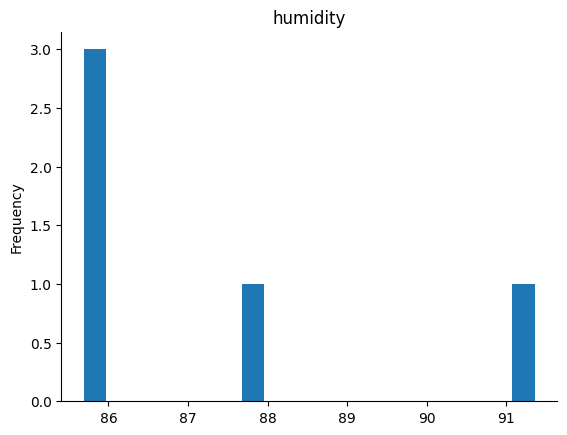

In [90]:
from matplotlib import pyplot as plt
_df_3['humidity'].plot(kind='hist', bins=20, title='humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

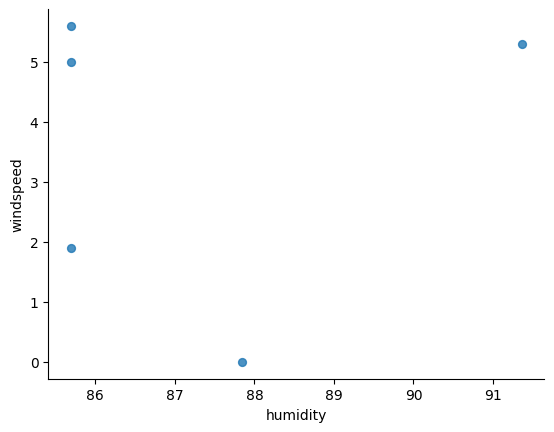

In [91]:
from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='humidity', y='windspeed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [92]:
weather_data_Jan_2022.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,609.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,514.0
mean,30.904704,23.895296,16.331452,56.232312,0.005023,11.693548,0.017097,0.962272,17.294745,8.336290,206.821237,1018.061828,49.062903,8.833602,77.514785,0.279167,0.763441,10.0
std,9.934512,12.924533,14.116709,17.510298,0.022211,32.155957,0.057355,2.003607,7.844096,4.112742,121.015817,10.220504,40.968287,2.483615,142.478965,0.512990,1.464872,0.0
min,10.400000,-4.600000,-7.700000,27.270000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,984.900000,0.000000,0.200000,0.000000,0.000000,0.000000,10.0
25%,23.500000,15.575000,5.900000,42.652500,0.000000,0.000000,0.000000,0.000000,11.600000,5.500000,63.750000,1011.200000,13.400000,9.900000,0.000000,0.000000,0.000000,10.0
50%,30.500000,24.200000,14.000000,50.990000,0.000000,0.000000,0.000000,0.000000,18.200000,8.100000,240.000000,1018.350000,23.800000,9.900000,0.500000,0.000000,0.000000,10.0
75%,37.400000,32.025000,25.800000,66.947500,0.000000,0.000000,0.000000,0.062500,23.000000,11.125000,305.000000,1026.300000,100.000000,9.900000,82.250000,0.300000,1.000000,10.0
max,58.500000,58.500000,53.500000,95.860000,0.283000,100.000000,0.240000,7.430000,35.300000,21.900000,360.000000,1036.300000,100.000000,9.900000,583.000000,2.100000,6.000000,10.0


In [93]:
weather_data_Jan_2022.dtypes

name                 object
datetime             object
temp                float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir               int64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation        int64
solarenergy         float64
uvindex               int64
severerisk          float64
conditions           object
icon                 object
stations             object
dtype: object

In [94]:
weather_data_Jan_2022.drop(['severerisk','windgust','preciptype','conditions','icon','stations'], axis=1, inplace=True)


In [95]:
weather_data_Jan_2022.isna().sum()

name                0
datetime            0
temp                0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
dtype: int64

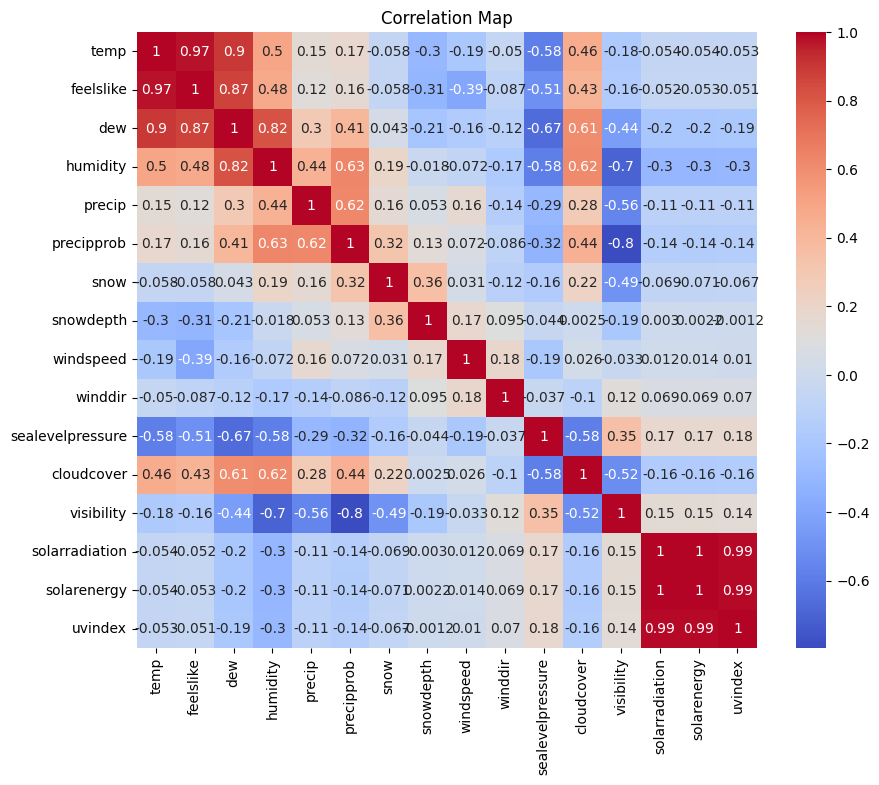

In [96]:
weather_data_Jan_2022_NoOBJ = weather_data_Jan_2022.select_dtypes(exclude=['object'])
# prompt: show a correlation map of those features.

import matplotlib.pyplot as plt
corr_matrix = weather_data_Jan_2022_NoOBJ.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()


From the above correlation plot, we can confirm that only a few of the variables are highly correlated.

They are:

i. Temp vs feelslike vs drew: These columns are highly correlated if the temperature directly affects the others.

ii. Precipprob bs humidity: If the humidity is more, there is a high chance that precipitation is also high.

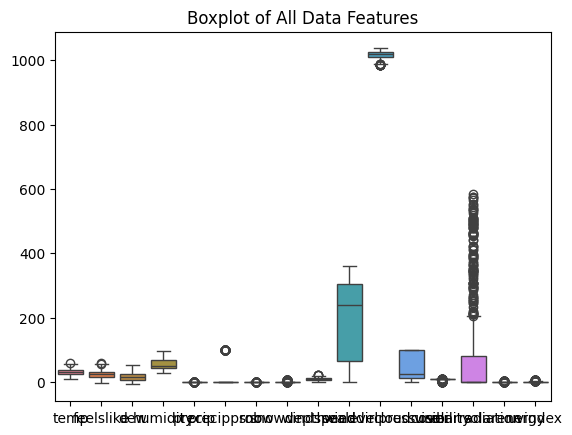

In [97]:
# prompt: plot outlies of all data features together

import matplotlib.pyplot as plt
sns.boxplot(data=weather_data_Jan_2022_NoOBJ)
plt.title('Boxplot of All Data Features')
plt.show()


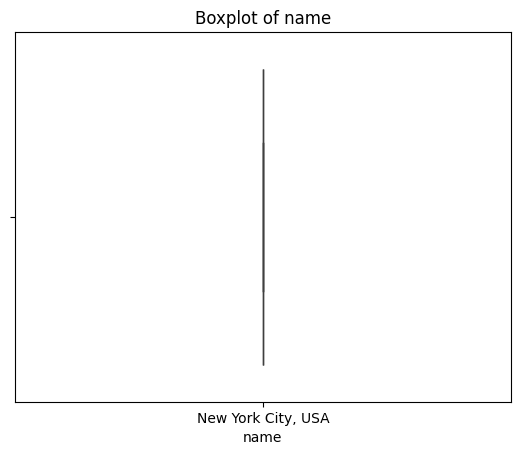

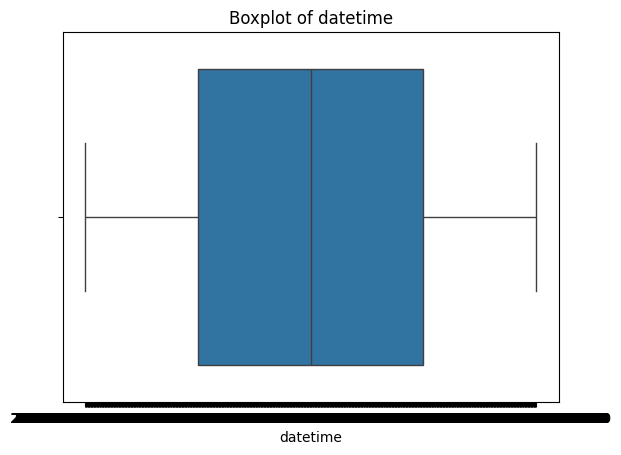

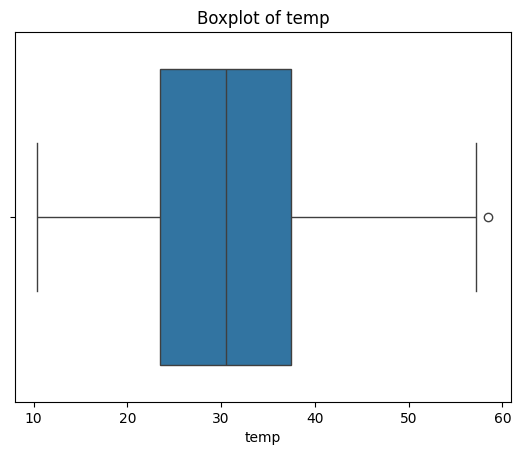

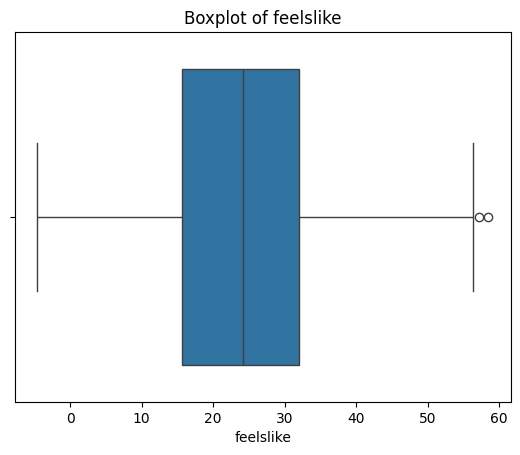

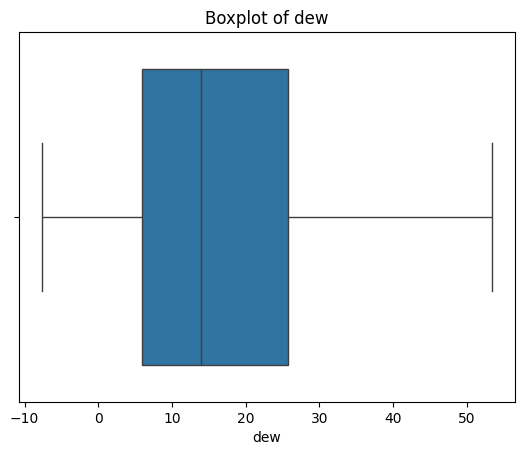

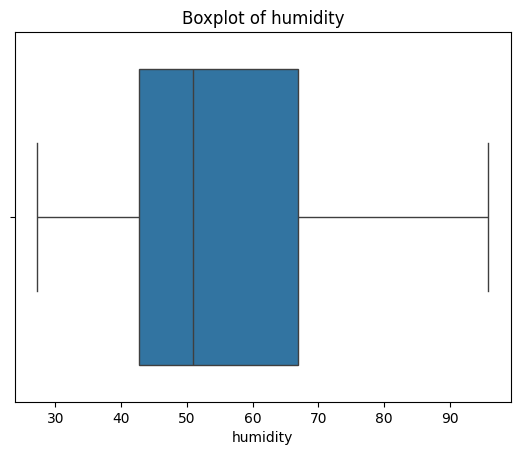

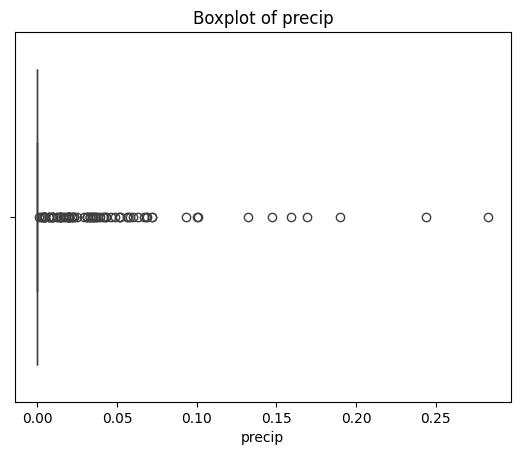

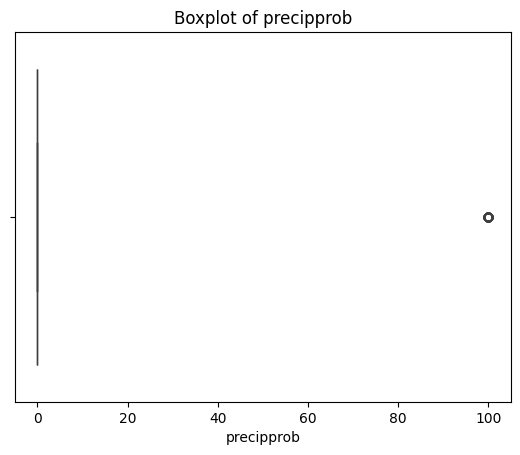

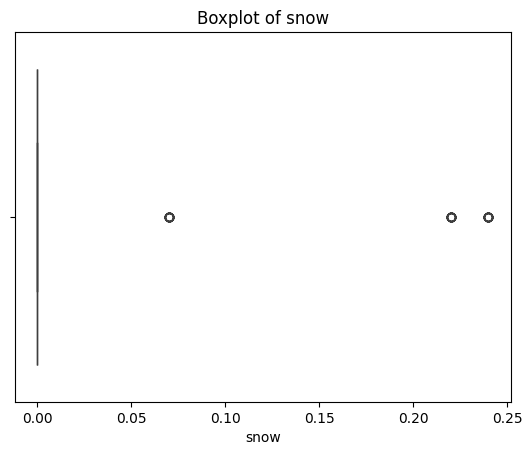

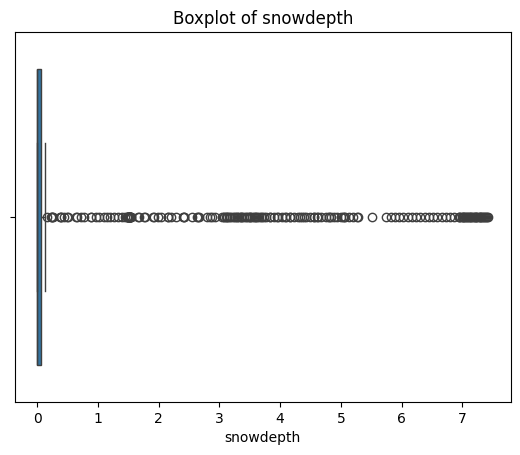

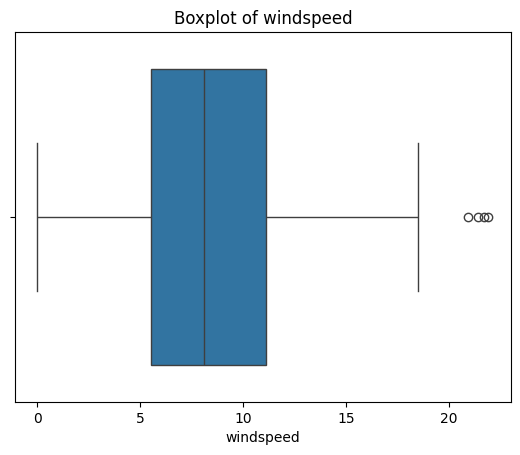

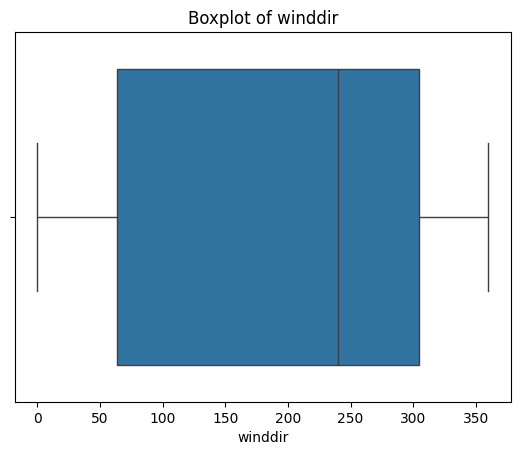

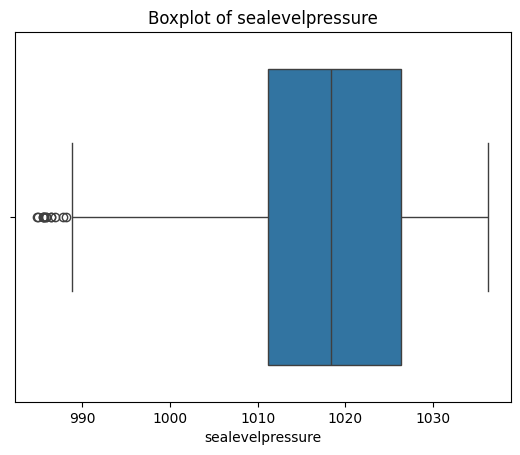

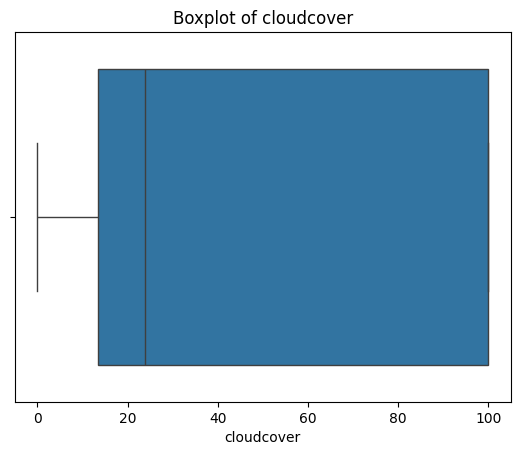

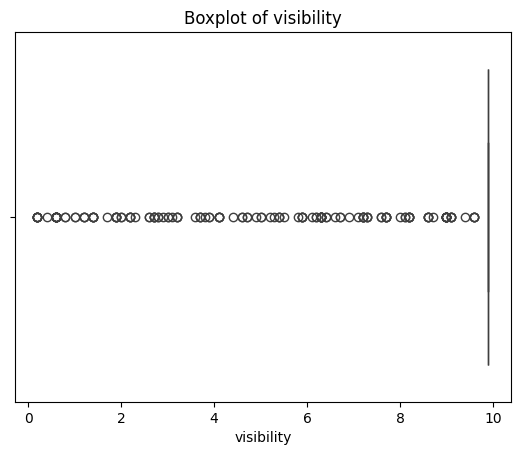

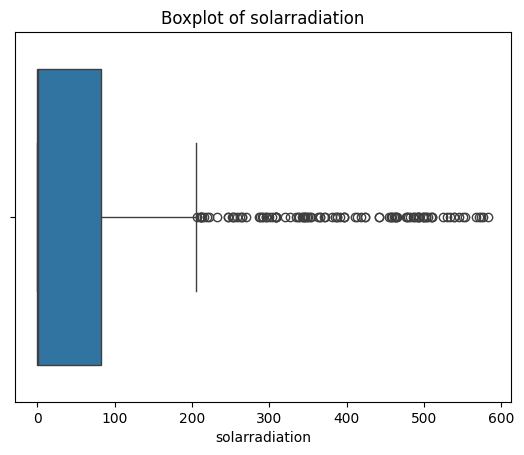

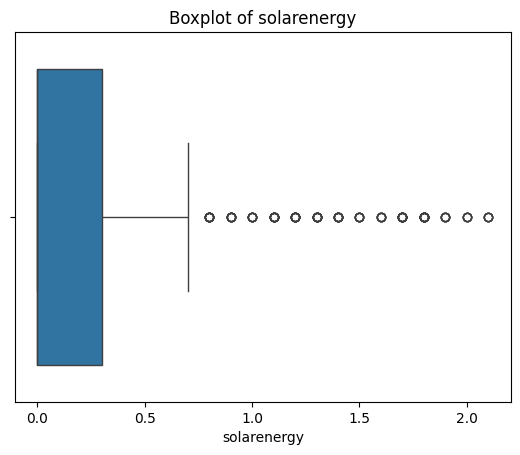

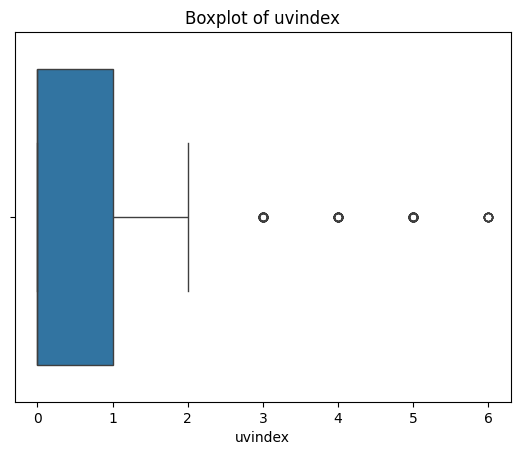

In [98]:
# prompt: plot the outlires of the data column by column

import matplotlib.pyplot as plt
for column in weather_data_Jan_2022.columns:
  sns.boxplot(x=weather_data_Jan_2022[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [69]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =weather_data_Jan_2022["precipprob"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 100
100 percentile value is  100


In [70]:
#looking further from the 99th percecntile
for i in range(80,100):
    var =weather_data_Jan_2022["precipprob"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

80 percentile value is 0
81 percentile value is 0
82 percentile value is 0
83 percentile value is 0
84 percentile value is 0
85 percentile value is 0
86 percentile value is 0
87 percentile value is 0
88 percentile value is 0
89 percentile value is 100
90 percentile value is 100
91 percentile value is 100
92 percentile value is 100
93 percentile value is 100
94 percentile value is 100
95 percentile value is 100
96 percentile value is 100
97 percentile value is 100
98 percentile value is 100
99 percentile value is 100
100 percentile value is  100


In [67]:
# Create a range from 90 to 100 with increments of 0.1
percentile_range = np.arange(98, 100, 0.01)

# Loop over the percentile range
for i in percentile_range:
    # Calculate the percentile value
    percentile_value = np.percentile(weather_data_Jan_2022["precip"].values, i)
    # Print the percentile value
    print("{:.2f} percentile value is {:.2f}".format(i, percentile_value))


98.00 percentile value is 0.06
98.01 percentile value is 0.06
98.02 percentile value is 0.06
98.03 percentile value is 0.06
98.04 percentile value is 0.06
98.05 percentile value is 0.07
98.06 percentile value is 0.07
98.07 percentile value is 0.07
98.08 percentile value is 0.07
98.09 percentile value is 0.07
98.10 percentile value is 0.07
98.11 percentile value is 0.07
98.12 percentile value is 0.07
98.13 percentile value is 0.07
98.14 percentile value is 0.07
98.15 percentile value is 0.07
98.16 percentile value is 0.07
98.17 percentile value is 0.07
98.18 percentile value is 0.07
98.19 percentile value is 0.07
98.20 percentile value is 0.07
98.21 percentile value is 0.07
98.22 percentile value is 0.07
98.23 percentile value is 0.07
98.24 percentile value is 0.07
98.25 percentile value is 0.07
98.26 percentile value is 0.07
98.27 percentile value is 0.07
98.28 percentile value is 0.07
98.29 percentile value is 0.07
98.30 percentile value is 0.07
98.31 percentile value is 0.07
98.32 pe

Text(0.5, 1.0, 'Number of Missing values in attributes after Column Selection')

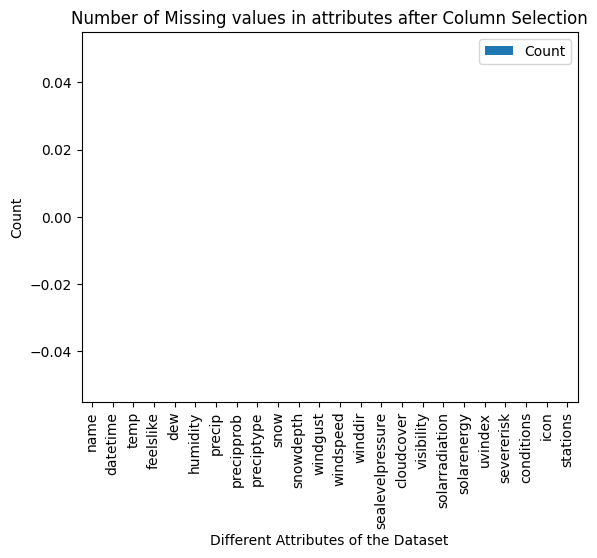

In [99]:
nan_count['Count'] = weather_data_Jan_2022.isna().sum()
nan_count.plot(kind="bar")
plt.xlabel('Different Attributes of the Dataset')
plt.ylabel('Count')
plt.title("Number of Missing values in attributes after Column Selection")

In [100]:
# save the data
output_dir = "/content/"
weather_data_Jan_2022.to_csv(output_dir+"weather_data_Jan_2022_cleaned.csv")